In [25]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np 
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
#Twitter api credentials
ConsumerKey       =  'PJHKZkuz3S11A8TALtvN8oCo9'
ConsumerSecret    =  '9Bfnu5S8WdK71O08ZdHd7Wa2H5CG2QpMWSCVkLzrQ6EymKIzfy'
accessToken       =  '1223257823141777408-ChNcuKATurPQaJS0BPymBhdeA4thCi'
accessTokenSecret =  '0vl7PnwSRMqjwshmvrKPKipDqiRMN70JIsYLKTuaD2Q7Z'

In [27]:
#Create the Authentication object
authenticate  = tweepy.OAuthHandler(ConsumerKey,ConsumerSecret)

#set the access token
authenticate.set_access_token(accessToken,accessTokenSecret)

#create the api object while passing in the authenticate information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [28]:
#multiple list carries different info. of fetched tweet
tweets_text = []
tweets_id= []
tweets_date = []
tweets_time = []
tweets_retweet_count = []
#fetching live tweets from twitter
try:
# Pulling individual tweets from query
    i=0
    for tweet in tweepy.Cursor(api.search , q='#covid19 -filter:retweets '  , count=100 , lang='en').items():
# Adding to list that contains all tweets
      tweets_text.append((tweet.text))
      tweets_id.append(tweet.id)
      tweets_date.append(tweet.created_at.date())
      tweets_time.append(tweet.created_at.time())
      tweets_retweet_count.append(tweet.retweet_count)
      i=i+1
      if i == 10000:
        break
      else:
        pass
except BaseException as e:
    print('failed on_status,',str(e))





In [29]:
#creating dataframe of tweet_text
twitter_df_text = pd.DataFrame(tweets_text,columns=['Tweet'])

#df of id 
twitter_df_id = pd.DataFrame(tweets_id,columns=['id'])

#df of date
twitter_df_date = pd.DataFrame(tweets_date,columns=['Date'])

#df of time
twitter_df_time = pd.DataFrame(tweets_time,columns=['Time'])

#df of retweet_count
twitter_df_retweet_count = pd.DataFrame(tweets_retweet_count,columns=['Retweet_count'])


In [30]:
#concatenating all the sub dataframes
twitter_df = pd.concat([twitter_df_id,twitter_df_date,twitter_df_time,twitter_df_text,twitter_df_retweet_count],axis=1)
twitter_df.info()
twitter_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             10000 non-null  int64 
 1   Date           10000 non-null  object
 2   Time           10000 non-null  object
 3   Tweet          10000 non-null  object
 4   Retweet_count  10000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


,id,Date,Time,Tweet,Retweet_count
0,1285479878276591617,2020-07-21,07:41:00,"During the #coronavirus pandemic, patient advo...",0
1,1285479857665777664,2020-07-21,07:40:55,Troy Asset Management’s Trojan Income has beco...,0
2,1285479855145070593,2020-07-21,07:40:55,@WhiteHouse As compared to your @GOP run #COVI...,0
3,1285479847213637632,2020-07-21,07:40:53,👉🏿What does the EU budget deal mean for develo...,0
4,1285479831275073536,2020-07-21,07:40:49,The science behind the Oxford vaccine \n\nRead...,0


In [31]:
#removing mentioned people
import re
for i in range(len(twitter_df['Tweet'])):
  twitter_df['Tweet'][i] = re.sub(r'@[A-Za-z0-9_A-Za-z0-9]+', '', twitter_df['Tweet'][i])

C:\Users\dhruvil\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
#to remove special characters and punctuation
spcl_char = [ '#' , '@' , '$'  , '*' , ':' , ';' , '?' , '/' ,  '!' , '|' , '\n' , '¿' , '\n' , ',' ,  '!' , ' " ','(' , ')' ,'+','-','<', '=', '>' , '[', ' \ ',']',' ` ',
             '{ ', '|' , '}',' ~ '] 
def char_remove():
  for char in spcl_char:
    twitter_df['Tweet']  = twitter_df['Tweet'].str.replace(char,"")
  return twitter_df['Tweet']
char_remove()
twitter_df.head(5)

,id,Date,Time,Tweet,Retweet_count
0,1285479878276591617,2020-07-21,07:41:00,During the coronavirus pandemic patient advoca...,0
1,1285479857665777664,2020-07-21,07:40:55,Troy Asset Management’s Trojan Income has beco...,0
2,1285479855145070593,2020-07-21,07:40:55,As compared to yourrun COVID19 death traps.Wh...,0
3,1285479847213637632,2020-07-21,07:40:53,👉🏿What does the EU budget deal mean for develo...,0
4,1285479831275073536,2020-07-21,07:40:49,The science behind the Oxford vaccine Read thi...,0


In [33]:
#removing link in Tweet if present
twitter_df['Tweet'] = twitter_df['Tweet'].str.replace('http\S+|www.\S+', '', case=False)
twitter_df.head(5)


,id,Date,Time,Tweet,Retweet_count
0,1285479878276591617,2020-07-21,07:41:00,During the coronavirus pandemic patient advoca...,0
1,1285479857665777664,2020-07-21,07:40:55,Troy Asset Management’s Trojan Income has beco...,0
2,1285479855145070593,2020-07-21,07:40:55,As compared to yourrun COVID19 death traps.Wh...,0
3,1285479847213637632,2020-07-21,07:40:53,👉🏿What does the EU budget deal mean for develo...,0
4,1285479831275073536,2020-07-21,07:40:49,The science behind the Oxford vaccine Read thi...,0


In [34]:
#to remove ascii characters
twitter_df['Tweet']  = twitter_df['Tweet'].str.replace("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", '')
twitter_df.head()

,id,Date,Time,Tweet,Retweet_count
0,1285479878276591617,2020-07-21,07:41:00,During the coronavirus pandemic patient advoca...,0
1,1285479857665777664,2020-07-21,07:40:55,Troy Asset Management’s Trojan Income has beco...,0
2,1285479855145070593,2020-07-21,07:40:55,As compared to yourrun COVID19 death traps.Wh...,0
3,1285479847213637632,2020-07-21,07:40:53,What does the EU budget deal mean for developm...,0
4,1285479831275073536,2020-07-21,07:40:49,The science behind the Oxford vaccine Read thi...,0


In [35]:
#adding polarity and subjectivity
from textblob import sentiments
def getpolarity(text):
    blob = TextBlob(text)
    sent = blob.sentiment.polarity
    return sent

def getsubjectivity(text):
    blob = TextBlob(text)
    sent = blob.sentiment.subjectivity
    return sent
twitter_df['polarity']  = twitter_df['Tweet'].apply(getpolarity)
twitter_df['subjectivity']  = twitter_df['Tweet'].apply(getsubjectivity)
twitter_df.head()

,id,Date,Time,Tweet,Retweet_count,polarity,subjectivity
0,1285479878276591617,2020-07-21,07:41:00,During the coronavirus pandemic patient advoca...,0,0.100000,0.400000
1,1285479857665777664,2020-07-21,07:40:55,Troy Asset Management’s Trojan Income has beco...,0,0.250000,0.333333
2,1285479855145070593,2020-07-21,07:40:55,As compared to yourrun COVID19 death traps.Wh...,0,0.250000,0.333333
3,1285479847213637632,2020-07-21,07:40:53,What does the EU budget deal mean for developm...,0,-0.239583,0.377083
4,1285479831275073536,2020-07-21,07:40:49,The science behind the Oxford vaccine Read thi...,0,0.033333,0.400000


In [36]:
#adding sentiment 
def category(text):
  blob1 = TextBlob(text)
  sent = blob1.sentiment.polarity
  if sent>0:
    status = "Positive"
  elif sent==0:
    status = "Neutral"
  else:
    status = "Negative"
  return status
twitter_df['Sentiment']  = twitter_df['Tweet'].apply(category)
twitter_df.head(500)


,id,Date,Time,Tweet,Retweet_count,polarity,subjectivity,Sentiment
0,1285479878276591617,2020-07-21,07:41:00,During the coronavirus pandemic patient advoca...,0,0.100000,0.400000,Positive
1,1285479857665777664,2020-07-21,07:40:55,Troy Asset Management’s Trojan Income has beco...,0,0.250000,0.333333,Positive
2,1285479855145070593,2020-07-21,07:40:55,As compared to yourrun COVID19 death traps.Wh...,0,0.250000,0.333333,Positive
3,1285479847213637632,2020-07-21,07:40:53,What does the EU budget deal mean for developm...,0,-0.239583,0.377083,Negative
4,1285479831275073536,2020-07-21,07:40:49,The science behind the Oxford vaccine Read thi...,0,0.033333,0.400000,Positive
...,...,...,...,...,...,...,...,...
495,1285476446366863361,2020-07-21,07:27:22,Ireland is donating the code for their COVID19...,4,0.000000,0.000000,Neutral
496,1285476441992376320,2020-07-21,07:27:21,How strong is this monitoring of COVID19 case...,0,0.433333,0.733333,Positive
497,1285476428096475136,2020-07-21,07:27:18,Well I know Kerala government has a answer for...,0,0.033333,0.066667,Positive
498,1285476421574565888,2020-07-21,07:27:16,This is a worldwide problem caused by China. T...,6,0.000000,0.000000,Neutral


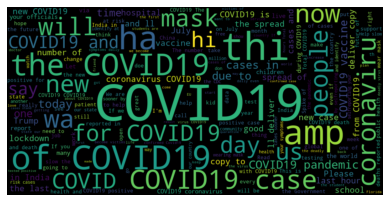

COVID19 Pandemic…  The New Development Bank will lend Brazil 1 billion to neutralize the economic impact of the COVID19 pandemic b…  sheplenomore wakeupsheeple sheeple panicdemic herdimmunity chinavirus covid19 covid What with so many…  26yearold female of Cuttack &amp 7 other COVID19 patients die in Odisha OdishaFightsCoronavirus   Why did DictatorDonny ignore COVID19 all of MarchWhy has no one inheld him accountable for all…  For people that are earning their livelihoods from home in this pandemic you are forcing them to seek help outside…  A recent study revealed that 76% of surveyed millennials said their household income has been negatively affected b…  Covid19Onyeama Tests Positive Days After Meeting Buhari 10 Ministers  the Indian DGHS has written a warning against the use of N95 masks with valved respirators by people saying these…  Nigerian banks are restructuring 41% of loans in the country after the central bank placed a moratorium on interest…  Who said you can't draw. Moti

In [56]:
#VISUALISATION part starts from here

#Plotting the wordcloud 
allwords  = ' '.join([tweets for tweets in twitter_df['Tweet']])
wordcloud = WordCloud(max_font_size=160,width=1200 , height=600,max_words= 200 ).generate(allwords)
plt.imshow(wordcloud, cmap = 'plasma',interpolation='bilinear')
plt.axis('off')
plt.show( )

print(allwords)

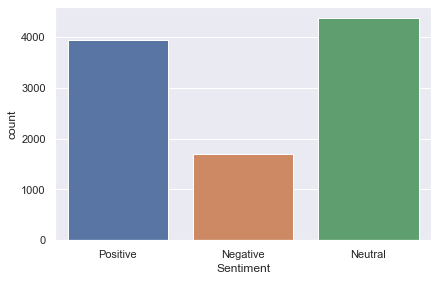

In [38]:
#plotting COUNTER plot
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x='Sentiment', data= twitter_df )

[]

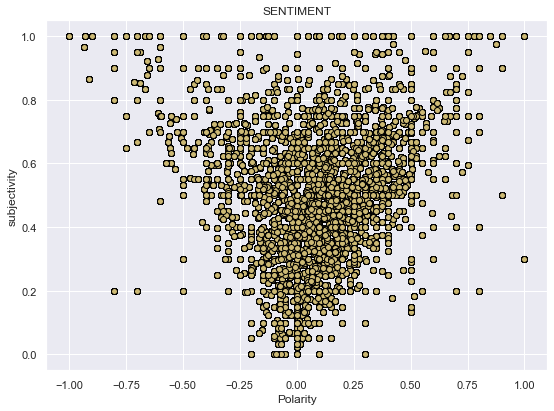

In [39]:
#plotting polarity and subjectivity
plt.figure(figsize=(8,6) )
#i is basically a total no. of rows
for j in range(0,i):
  plt.scatter(twitter_df['polarity'],twitter_df['subjectivity'],edgecolor='black',cmap='plasma' )
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.title('SENTIMENT')
plt.plot()




In [40]:
#creating dataframes that consist of only positive,negative and neutral tweets only
twitter_df_pos = twitter_df.loc[twitter_df['Sentiment'] == 'Positive' ]
twitter_df_neg = twitter_df.loc[twitter_df['Sentiment'] == 'Negative' ]
twitter_df_neut = twitter_df.loc[twitter_df['Sentiment'] == 'Neutral' ]

#resetting index
twitter_df_pos.reset_index(drop=True , inplace=True)
twitter_df_neg.reset_index(drop=True , inplace=True)
twitter_df_neut.reset_index(drop=True , inplace=True)




[]

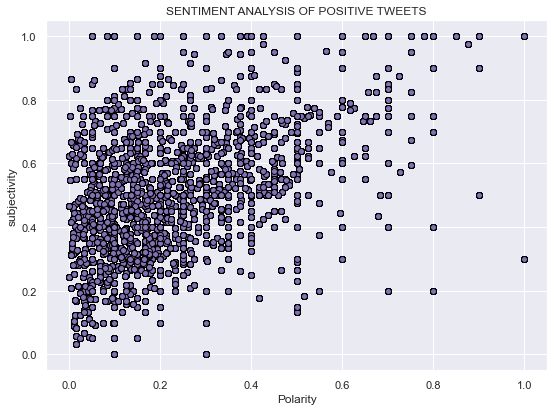

In [41]:
#polarity vs subjectivity graph of positive tweets
plt.figure(figsize=(8,6) )


for j in range(0,len(twitter_df_pos)):
  plt.scatter(twitter_df_pos['polarity'],twitter_df_pos['subjectivity'],edgecolor='black',cmap='plasma' )
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.title('SENTIMENT ANALYSIS OF POSITIVE TWEETS')
plt.plot()

[]

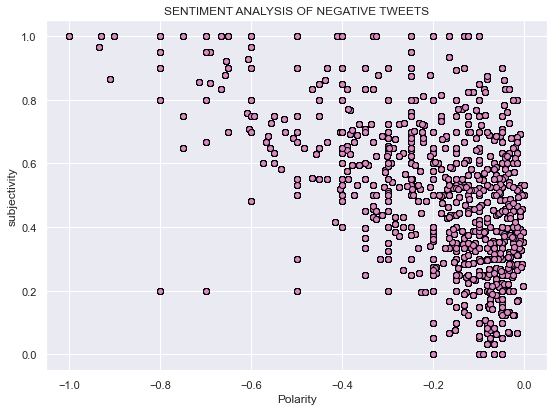

In [42]:
#polarity vs subjectivity graph of negative tweets
plt.figure(figsize=(8,6) )


for j in range(0,len(twitter_df_neg)):
  plt.scatter(twitter_df_neg['polarity'],twitter_df_neg['subjectivity'],edgecolor='black',cmap='plasma' )
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.title('SENTIMENT ANALYSIS OF NEGATIVE TWEETS')
plt.plot()

[]

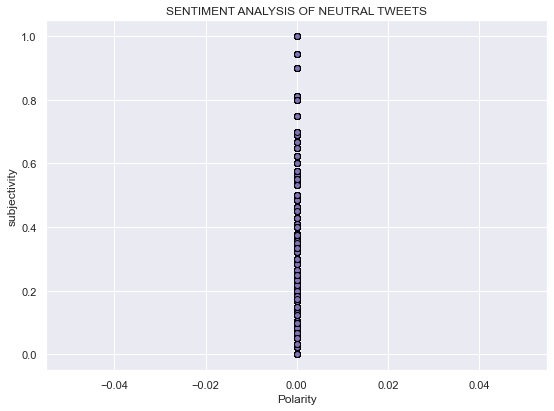

In [43]:
#polarity vs subjectivity graph of Neutral tweets
plt.figure(figsize=(8,6) )


for j in range(0,len(twitter_df_pos)):
  plt.scatter(twitter_df_neut['polarity'],twitter_df_neut['subjectivity'],edgecolor='black',cmap='plasma' )
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.title('SENTIMENT ANALYSIS OF NEUTRAL TWEETS')
plt.plot()

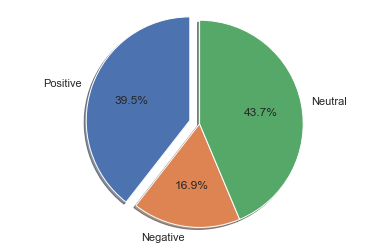

In [44]:
#plotting pie chart

#calculating the percentage of pos,neg and neut among 10000 tweets
percent_pos  = (len(twitter_df_pos)/len(twitter_df))*100
percent_neg  = (len(twitter_df_neg)/len(twitter_df))*100
percent_neut  = (len(twitter_df_neut)/len(twitter_df))*100

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [percent_pos,percent_neg,percent_neut]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Positive')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [45]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
  
def text_process(tweet):
  
  return [word for word in tweet.split() if word.lower() not in stopwords.words('english')]
      
twitter_df['Tweet'].apply(text_process)
twitter_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhruvil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,Date,Time,Tweet,Retweet_count,polarity,subjectivity,Sentiment
0,1285479878276591617,2020-07-21,07:41:00,During the coronavirus pandemic patient advoca...,0,0.100000,0.400000,Positive
1,1285479857665777664,2020-07-21,07:40:55,Troy Asset Management’s Trojan Income has beco...,0,0.250000,0.333333,Positive
2,1285479855145070593,2020-07-21,07:40:55,As compared to yourrun COVID19 death traps.Wh...,0,0.250000,0.333333,Positive
3,1285479847213637632,2020-07-21,07:40:53,What does the EU budget deal mean for developm...,0,-0.239583,0.377083,Negative
4,1285479831275073536,2020-07-21,07:40:49,The science behind the Oxford vaccine Read thi...,0,0.033333,0.400000,Positive


In [47]:
#fitting Tweet data 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
bow_transfromer = CountVectorizer(analyzer=text_process).fit(twitter_df['Tweet'])


In [48]:
Tweet_bow = bow_transfromer.transform(twitter_df['Tweet'])

In [49]:
tfidf_transformer = TfidfTransformer().fit(Tweet_bow)
tweet_tfidf = tfidf_transformer.transform(Tweet_bow)

In [50]:
from sklearn.naive_bayes import MultinomialNB
tweet_detect = MultinomialNB().fit(tweet_tfidf,twitter_df['Sentiment'])

In [51]:
tweet_pred = tweet_detect.predict(tweet_tfidf)
pred_df  = pd.DataFrame(tweet_pred,columns=['Prediction'])

net_df = pd.concat([twitter_df['Tweet'],twitter_df['Sentiment'],pred_df],axis = 1)
print(net_df )

                                                  Tweet Sentiment Prediction
0     During the coronavirus pandemic patient advoca...  Positive   Positive
1     Troy Asset Management’s Trojan Income has beco...  Positive   Positive
2      As compared to yourrun COVID19 death traps.Wh...  Positive   Positive
3     What does the EU budget deal mean for developm...  Negative    Neutral
4     The science behind the Oxford vaccine Read thi...  Positive   Positive
...                                                 ...       ...        ...
9995  We need to ensure we have good quality jobs in...  Positive   Positive
9996  The good thing with this specific case judging...  Positive   Positive
9997   Millions infected 140K dead cases skyrocketin...  Negative   Positive
9998  Florida COVID19 CoronaVirus Florida GovDesanti...   Neutral    Neutral
9999  VIDEO ReportCoronavirus in SouthAfrica A day i...  Positive   Positive

[10000 rows x 3 columns]


In [60]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(net_df["Sentiment"], tweet_pred)

In [63]:
net_df[acc] = acc
net_df

,Tweet,Sentiment,Prediction,0.8695
0,During the coronavirus pandemic patient advoca...,Positive,Positive,0.8695
1,Troy Asset Management’s Trojan Income has beco...,Positive,Positive,0.8695
2,As compared to yourrun COVID19 death traps.Wh...,Positive,Positive,0.8695
3,What does the EU budget deal mean for developm...,Negative,Neutral,0.8695
4,The science behind the Oxford vaccine Read thi...,Positive,Positive,0.8695
...,...,...,...,...
9995,We need to ensure we have good quality jobs in...,Positive,Positive,0.8695
9996,The good thing with this specific case judging...,Positive,Positive,0.8695
9997,Millions infected 140K dead cases skyrocketin...,Negative,Positive,0.8695
9998,Florida COVID19 CoronaVirus Florida GovDesanti...,Neutral,Neutral,0.8695


In [64]:
net_df.to_csv('Senti1.csv') 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
t_train,t_test,s_train,s_test = train_test_split(twitter_df['Tweet'],twitter_df['Sentiment'],test_size = 0.3)


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
                     ('bow',CountVectorizer(analyzer=text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', RandomForestClassifier())
])


In [ ]:
pipeline.fit(t_train,s_train)


In [ ]:
cc = pd.concat([t_test,s_test],axis=1)
prediction = pipeline.predict(t_test)
prediction = list(prediction)
cc['pred'] = prediction


print(cc)


In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(s_test,prediction))

In [ ]:
pip install nbconvert

In [ ]:
$ jupyter nbconvert --to HTML Copy_of_2020_part_3point1.ipynb